In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# load dataset

In [31]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
df.shape

(7043, 21)

In [33]:
df.drop('customerID', axis =1, inplace =True)

In [34]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [35]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [36]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [37]:
df[pd.to_numeric(df.TotalCharges,errors= 'coerce').isnull()].shape

(11, 20)

remove rows with space in TotalCharges

In [38]:
df1 = df[df.TotalCharges !=' ']
df1.shape

(7032, 20)

In [39]:
df.shape

(7043, 20)

In [40]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [41]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\soura\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [42]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Data visualization

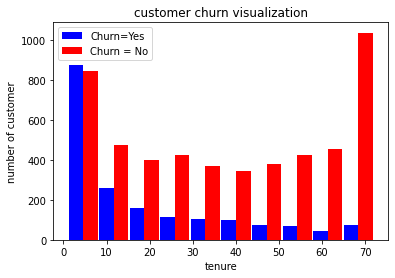

In [43]:
tenure_churn_no = df1[df1['Churn']=='No'].tenure
tenure_churn_yes = df1[df1['Churn']=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("number of customer")
plt.title("customer churn visualization")

plt.hist([tenure_churn_yes,tenure_churn_no],rwidth = 0.95, color=['blue', 'red'], label = ['Churn=Yes', 'Churn = No'])
plt.legend()

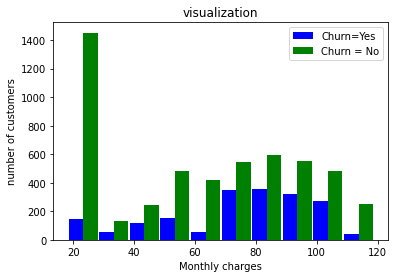

In [47]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn =="Yes"].MonthlyCharges
plt.xlabel("Monthly charges")
plt.ylabel("number of customers")
plt.title("visualization")

plt.hist([mc_churn_yes,mc_churn_no], rwidth = 0.95 , color = ['blue','green'], label = ['Churn=Yes', 'Churn = No'])
plt.legend()

In [49]:
def print_unique_value(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col}: {df[col].unique()}')

In [50]:
print_unique_value(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [52]:
df1.replace('No phone service','No', inplace =True)
df1.replace('No internet service', 'No', inplace = True)

In [53]:
print_unique_value(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [55]:
yes_no_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_col:
    df1[col].replace({'Yes':1,'No':0},inplace = True)

In [56]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [58]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace = True)

In [59]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [60]:
print_unique_value(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


## One hot encoding for categorical columns

In [61]:
df2 = pd.get_dummies(data =df1,  columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [62]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [65]:
cols_to_scale =['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [70]:
df2[cols_to_scale]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


# Train Test split

In [72]:
X = df2.drop('Churn', axis =1)
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size= 0.2, random_state = 24)

In [75]:
len(X_train.columns)

26

In [76]:
X.shape

(7032, 26)

# Build A model (ANN)

In [77]:
import tensorflow as tf
from tensorflow import keras

In [80]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation = 'relu'),
    keras.layers.Dense(15,activation = 'relu'),
    keras.layers.Dense(1, activation= "sigmoid")
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])




In [81]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 2s 9ms/step - loss: 0.5134 - accuracy: 0.7408
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.4328 - accuracy: 0.7918
Epoch 3/100
176/176 [==============================] - 2s 11ms/step - loss: 0.4255 - accuracy: 0.7940 0s - loss: 0.4
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.4219 - accuracy: 0.7968 0s - loss: 0.4207 - accuracy: 
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.4188 - accuracy: 0.7968 1s - loss: 0.4042 - accuracy: 0. - ETA: 1s - - ETA: 0s - loss: 0.416
Epoch 6/100
176/176 [==============================] - 2s 11ms/step - loss: 0.4174 - accuracy: 0.7982 0s - loss: 0.4153 - 
Epoch 7/100
176/176 [==============================] - 2s 13ms/step - loss: 0.4153 - accuracy: 0.7961
Epoch 8/100
176/176 [==============================] - 2s 12ms/step - loss: 0.4143 - accuracy: 0.8034 1s - loss: 0.4109 -  - ETA: 1s - loss: 0.4145  - 

In [82]:
model.evaluate(X_test , y_test)

44/44 [==============================] - 1s 16ms/step - loss: 0.4571 - accuracy: 0.7953


[0.4570564031600952, 0.7953091859817505]

In [84]:
yp = model.predict(X_test)

In [85]:
yp[:5]

array([[0.6996896 ],
       [0.01415867],
       [0.17269385],
       [0.48554596],
       [0.8401712 ]], dtype=float32)

In [86]:
y_pred = []
for ele in yp:
    if ele > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [87]:
y_pred[:5]

[1, 0, 0, 0, 1]

# confusion matrix

Text(69.0, 0.5, 'Truth')

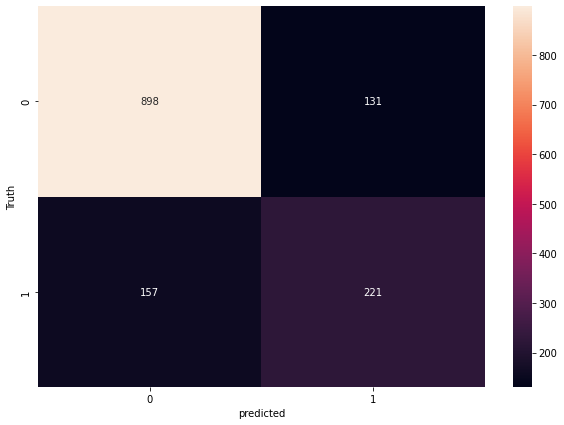

In [89]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_pred)

plt.figure(figsize =(10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("predicted")
plt.ylabel("Truth")